In [3]:
#https://superfastpython.com/multiprocessing-pool-python/

from multiprocessing import pool, get_context
# worker process initialization function
def worker_init(arg1, arg2, arg3):
    # ...
    value = arg1 * arg2 * arg3
    return value


arg1 = arg2 = arg3 = 5
ctx = get_context('fork')
# create a process pool and initialize workers
pool_processes = pool.Pool(processes=4, initializer=worker_init, initargs=(arg1, arg2, arg3), maxtasksperchild=5, context=ctx)
print(pool_processes)

<multiprocessing.pool.Pool state=RUN pool_size=4>


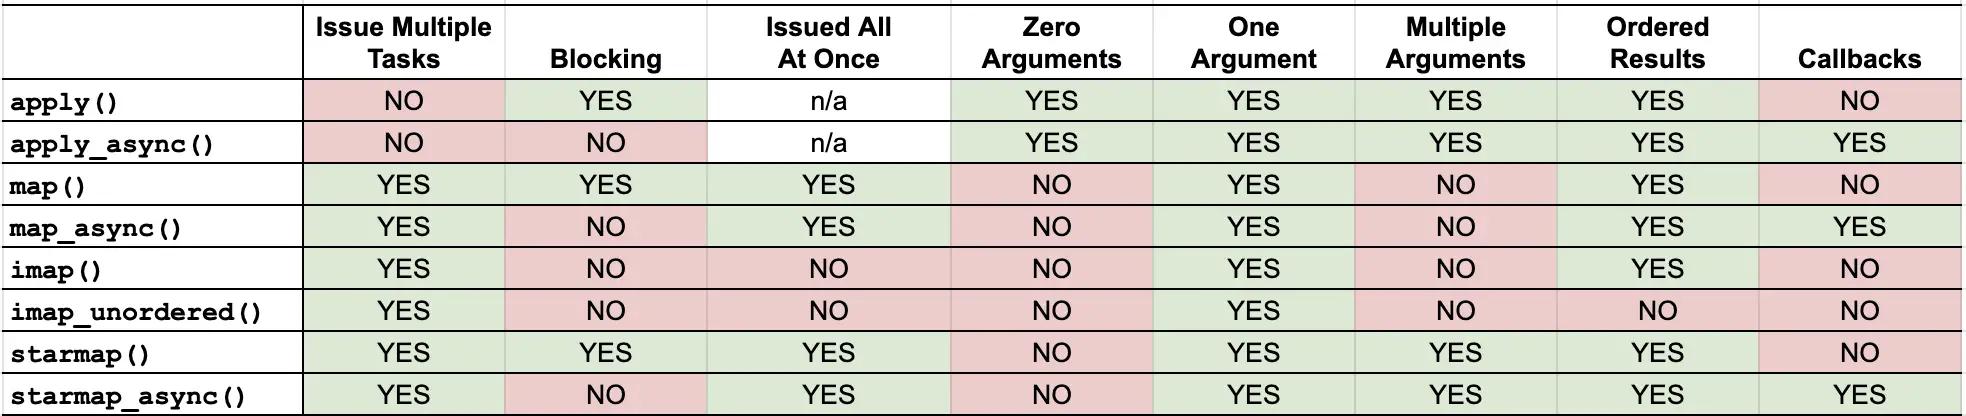

In [5]:
from IPython.display import Image
Image(filename='Table-Comparison-of-Issuing-Tasks-to-the-Process-Pool.jpg') 

In [ ]:
# issue a task to the process pool
result = pool.apply_async(...)

# get the result of the task or tasks
value = result.get()

try:
    # get the task result with a timeout
    value = result.get(timeout=10)
except TimeoutError as e:
    # ...
    pass

In [ ]:
# issue a task to the process pool
result = pool.apply_async(...)

# get the result of the task or tasks
value = result.get()

try:
    # get the task result that might raise an exception
    value = result.get()
except Exception as e:
    # ...
    pass

In [ ]:
# wait for issued task to complete with a timeout
result.wait(timeout=10)
# check if the tasks are all done
if result.ready():
    print('All Done')
    #...
else:
    print('Not Done Yet')

In [ ]:
# check if the tasks have completed
if result.ready():
    # check if the tasks were successful
    if result.successful():
        print('Successful')
    else:
        print('Unsuccessful')

In [ ]:
try:
    # check if the tasks were successful
    if result.successful():
        print('Successful')
except ValueError as e:
    print('Tasks still running')

In [ ]:
# result callback function
def result_callback(result):
	print(result, flush=True)
    #...
    
# issue a single task
result = pool.apply_async(..., callback=result_callback)

In [ ]:
# result callback function
def result_callback(result):
	# iterate all results
	for value in result:
		print(value, flush=True)
    #...
# issue a single task
result = pool.map_async(..., callback=result_callback)

In [ ]:

# error callback function
def custom_callback(error):
	print(error, flush=True)
    #...

# issue a single task
result = pool.apply_async(..., error_callback=custom_callback)